In [63]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import mannwhitneyu

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair programming A/B testing

## Ejericicios de A/B Testing

Ejercicio 1:

Supongamos que estamos realizando un experimento para determinar si un nuevo diseño de anuncio (test group "ad") tiene un impacto significativo en la tasa de conversión en comparación con el diseño de anuncio anterior (test group "psa").

Objetivo del ejercicio: Comparar las tasas de conversión entre los grupos de prueba "ad" y "psa" para determinar si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios.

    - Pasos que debemos seguir:

        1. Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

        2. Definición de las hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento (en este caso os las damos definidas):

                - Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

                - Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

        3. Cálculo de la tasa de conversión: Calcula la tasa de conversión para cada grupo:

                - Para el grupo "ad", la tasa de conversión es el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.

                - Para el grupo "psa", realiza el mismo cálculo.

        4. Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student o la prueba chi-cuadrado, para comparar las tasas de conversión entre los grupos "ad" y "psa".

        5. Análisis de resultados:

                - Si el valor p es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en las tasas de conversión entre los grupos.

                - Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

        6. Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios que el diseño anterior. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.


In [64]:
df = pd.read_csv ('files/marketing_AB.csv', index_col=0)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [65]:
df['converted'].unique()

array([False,  True])

In [66]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [67]:
# es un problema de proporciones

In [68]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [69]:
(df.isnull().sum() / df.shape[0]) * 100

user id          0.0
test group       0.0
converted        0.0
total ads        0.0
most ads day     0.0
most ads hour    0.0
dtype: float64

In [70]:
df.duplicated().sum()

0

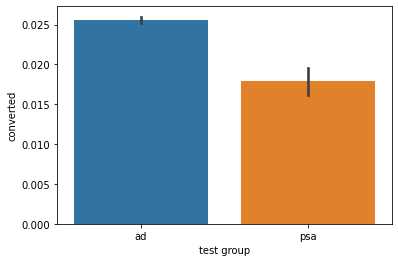

In [71]:
sns.barplot (x = 'test group', y = 'converted', data = df);

In [72]:
tabla_contingencia = pd.crosstab(df['test group'], df['converted'], normalize = True) * 100
tabla_contingencia

converted,False,True
test group,,
ad,93.547537,2.452470
psa,3.928577,0.071416


 - Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

 - Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

In [73]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)
# Imprimir el resultado de la prueba

alpha = 0.05

if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de clics entre el Grupo de Control y el Grupo de Prueba.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)
else:
    print("No hay evidencia de una diferencia significativa en las tasas de clics entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que la nueva campaña no esta ayudando a nuestro problema. """)

No hay evidencia de una diferencia significativa en las tasas de clics entre los grupos.

 ---------- 

 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que la nueva campaña no esta ayudando a nuestro problema. 


Ejercicio 2:

En este caso, vamos a realizar un experimento para comparar la cantidad promedio de anuncios vistos por los usuarios en los grupos "ad" y "psa" y determinar si hay una diferencia significativa entre ellos.

    - Objetivo del experimento: Comparar la cantidad promedio de anuncios vistos por usuario entre los grupos de prueba "ad" y "psa" para determinar si el tipo de anuncio afecta la cantidad de anuncios que los usuarios ven.

    - Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

    - Hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento. En este caso, las deberéis plantear vosotras

    - Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student, para comparar la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa". Esto te permitirá determinar si hay una diferencia significativa entre los dos grupos.

    - Análisis de resultados:

            - Si el valor p (p-value) es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.

            - Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

    - Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el tipo de anuncio (ad o psa) tiene un impacto significativo en la cantidad promedio de anuncios vistos por usuario. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.

In [74]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [75]:
pd.crosstab(df['test group'], df['total ads'])
#en este caso no tiene sentido, no es un problema de proporciones. 
#No tiene sentido hacer una tabla de contingencia, tenemos muchisimas columnas
#podemos evaluar los anuncios utilizando las medias

total ads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,514,515,516,517,518,519,520,521,522,523,524,525,526,527,530,532,533,535,536,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,578,579,580,581,582,583,584,585,586,587,588,591,592,593,594,595,596,597,598,599,601,602,603,604,606,607,608,609,610,611,612,613,615,616,617,619,620,621,622,624,625,627,628,629,630,631,633,634,636,637,638,639,640,641,642,643,645,646,647,648,649,651,652,653,654,655,656,657,659,660,662,663,664,665,667,669,670,672,673,675,678,679,680,681,684,687,688,689,690,691,695,698,699,700,702,703,704,705,706,709,710,711,712,713,714,716,719,720,722,723,724,727,728,729,730,731,733,734,735,738,739,742,743,744,745,753,758,759,760,761,763,764,769,771,772,775,779,781,785,786,788,789,790,791,792,794,797,798,799,800,802,804,805,806,808,809,812,815,817,820,825,827,828,840,841,842,845,852,854,857,858,863,865,869,873,883,885,887,888,891,894,901,904,907,908,909,911,915,920,921,923,925,926,932,934,938,947,950,952,955,961,983,986,991,1003,1010,1011,1014,1015,1016,1020,1021,1032,1035,1056,1057,1100,1101,1128,1129,1135,1146,1173,1196,1229,1232,1267,1302,1321,1328,1354,1391,1398,1414,1491,1632,1680,1778,2065
test group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ad,54298,37911,27

In [76]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [77]:
ad_mean = df[df['test group'] == 'ad']['total ads'].mean()
psa_mean = df[df['test group'] == 'psa']['total ads'].mean()

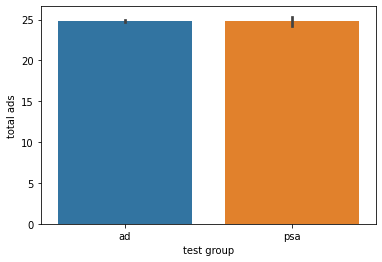

In [78]:
sns.barplot (data = df, y = 'total ads', x = 'test group');

In [79]:
#vamos a estudiar la normalidad

#h0: los datos son normales
#h1: los datos no son normales

#si p_value > 0.05 : son normales, aceptamos h0
#si p_value < 0.05 : no son normales, rechazamos h0

In [81]:
#calculamos la normalidad con el test de shapiro

p_value = shapiro(df['total ads']).pvalue

alpha = 0.05

if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 0.0 )


- h0: no hay diferencias significativas 
- h1: hay diferencias significativas

si p_value < 0.05, rechazamos h0
si p_value > 0.05, aceptamos h0

In [82]:
#vamos a definir los grupos
grupo_ad = df[df['test group'] == 'ad']
grupo_psa = df[df['test group'] == 'psa']

In [84]:
#como los datos no son normales, hacemos el test de Mann Whitney

metrica_psa = grupo_psa['total ads']
metrica_ad = grupo_ad['total ads']

u_statistic, p_value = stats.mannwhitneyu(metrica_psa, metrica_ad)

print(p_value)


# como p_value es < 0.05, las medianas son diferentes, podemos rechazar H0
# existen diferencias significativas entre ambos grupos 
# concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.

4.6909108547205694e-11


In [87]:
ad_median = df[df['test group'] == 'ad']['total ads'].median()
psa_median = df[df['test group'] == 'psa']['total ads'].median()

In [88]:
ad_median

13.0

In [89]:
psa_median

12.0

In [ ]:
#en base a las medianas, podemos concluir que el grupo ad es el que está viendo una mayor cantidad de anuncios. Es recomendable implementar el anuncio nuevo.